In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import glob
import csv
from collections import defaultdict
import scipy
from scipy import stats
# from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
lightblue , darkblue, lightgreen, darkgreen, pink =  '#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99'
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
from statsmodels.formula.api import ols
# import statsmodels.api as sm
# lowess = sm.nonparametric.lowess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import seaborn as sns


In [3]:
# set time scale
timestep = 1.0/1000
Time = 1.0 * np.arange(25000) *timestep

# constant  parameters
Gamma = 0.01 # mRNA degradation rate
Koffconst = 0.1 #start with constant

<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_79484/3764479991.py:22: SyntaxWarning: invalid escape sequence '\ '
  plt.plot(Time,mRNA,lw=2,     label=f'$K_{{\\mathrm{{on}}}} = {Kon:.2f},\ r = {r:.1f}$')
/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_79484/3764479991.py:48: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for item in legend.legendHandles:


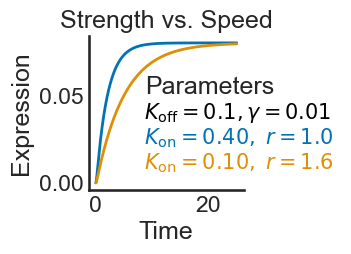

In [5]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('colorblind')

fig3, axes = plt.subplots( figsize=(2,2))

def mRNA_of_t(r,gamma,Kon,Koff):
    #setup initial conditions
    Pon = [0]
    Poff = [1]
    mRNA = [0]
    for i,time in enumerate(Time,start=0):
        if i >0:
            # calculate the change
            mRNA_delta = timestep*r*Pon[-1]-gamma*mRNA[-1]
            Pon_delta = timestep*Kon*Poff[-1]-timestep*Koff*Pon[-1]
            Poff_delta = timestep*Koff*Pon[-1]-timestep*Kon*Poff[-1]
            # update values
            mRNA.append(mRNA[-1]+mRNA_delta)
            Pon.append(Pon[-1]+Pon_delta)
            Poff.append(Poff[-1]+Poff_delta)
    plt.plot(Time,mRNA,lw=2,     label=f'$K_{{\\mathrm{{on}}}} = {Kon:.2f},\ r = {r:.1f}$')

#     print(len(time))
mRNA_of_t(r=1,gamma=Gamma,Kon=.4,Koff=Koffconst,)
#mRNA_of_t(r=2,gamma=Gamma,Kon=.4,Koff=Koffconst)
# mRNA_of_t(r=.5,gamma=Gamma,Kon=.4,Koff=Koffconst)
# mRNA_of_t(r=1,gamma=Gamma,Kon=.1,Koff=Koffconst)
mRNA_of_t(r=1.6,gamma=Gamma,Kon=.1,Koff=Koffconst)
# mRNA_of_t(r=5,gamma=Gamma,Kon=.01,Koff=Koffconst)

# Add legend for the parameters
legend_lines = [
    mpatches.Patch(
        color='black', 
        label=f'$K_{{\\mathrm{{off}}}} = {Koffconst:.1f}, \\gamma = {Gamma:.2f}$'
    )
]
for line in axes.get_lines():
    legend_lines.append(mpatches.Patch(color=line.get_color(), label=line.get_label()))

legend = plt.legend(handles=legend_lines, frameon=False, title="Parameters", labelspacing=0.07, fontsize = 'small', bbox_to_anchor = (1.7,-0.02), loc = 'lower right')

for text, patch in zip(legend.get_texts(), legend_lines[:3]):  # Skip the first black patch
    text.set_color(patch.get_facecolor())

# Remove the colored boxes entirely
for item in legend.legendHandles:
    item.set_visible(False)

# Bring tick labels closer
axes.tick_params(axis='x', pad=-5)
axes.tick_params(axis='y', pad=-5)


plt.xlabel('Time'), plt.ylabel('Expression')
plt.xticks([0,20])
plt.yticks([0,.05])
plt.title('Strength vs. Speed')
sns.despine()
#plt.savefig('Figures_RandomTelegraph/RandomTelegraph_SeparateStrengthSpeed.png')
plt.show()

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_78616/3105559149.py:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for item in legend.legendHandles:


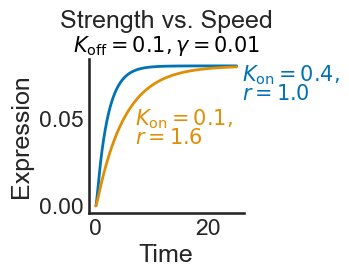

In [157]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('colorblind')

fig3, axes = plt.subplots( figsize=(2,2))

mRNA_of_t(r=1,gamma=Gamma,Kon=.4,Koff=Koffconst,)
mRNA_of_t(r=1.6,gamma=Gamma,Kon=.1,Koff=Koffconst)

# Adjust to desired positions, ordered by plots above
coords = [(25.5, 0.07), (6.5, 0.045)]

# modify [(0.4,1.0),(0.1,1.6)] to necessary parameters
for line, (Kon_val, r_val), (x_end, y_end) in zip(axes.get_lines(), [(0.4,1.0),(0.1,1.6)], coords):
    plt.text(x_end + 0.5, y_end, f'$K_{{\\mathrm{{on}}}} = {Kon_val:.1f},$\n$r = {r_val:.1f}$',  
             color=line.get_color(), va='center', fontsize = 'small', linespacing = 0.8)

# Bring axis labels closer
axes.tick_params(axis='x', pad=-5) 
axes.tick_params(axis='y', pad=-5) 

# Remove the colored boxes entirely
for item in legend.legendHandles:
    item.set_visible(False)

plt.xlabel('Time')
plt.ylabel('Expression')

# Add title
plt.text(
    0.5, 1.32,  # x, y in axes fraction coordinates
    f'Strength vs. Speed',
    ha='center', va='top', 
    transform=plt.gca().transAxes,
    fontsize='medium'  # size of first line; second line will inherit
)
# make second line smaller
plt.text(
    0.5, 1.01,
    f'$K_{{\\mathrm{{off}}}} = {Koffconst:.1f}, \\gamma = {Gamma:.2f}$',
    ha='center', va='bottom', 
    transform=plt.gca().transAxes,
    fontsize='small', color='black'
)

sns.despine()
#plt.savefig('Figures_RandomTelegraph/RandomTelegraph_SeparateStrengthSpeed.png')
plt.show();